# CLARANS by pyclustering

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall


In [21]:
# Load data from CSV
data = pd.read_csv('./IRIS.csv')

In [22]:
# Extract only 'petal_length' and 'petal_width' attributes for clustering
data_features = data[['petal_length', 'petal_width']].values

In [23]:
# perform CLARANS
clarans_instance = clarans(data_features, number_clusters=3, numlocal=6, maxneighbor=4)
(ticks, result) = timedcall(clarans_instance.process) # important
clusters = clarans_instance.get_clusters()
print("Cluseters : ",clusters)

Cluseters :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [52, 70, 72, 77, 83, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106]]


In [24]:
# Assign cluster labels to data points
data['cluster'] = -1  # Initialize cluster labels
for cluster_id, row_number in enumerate(clusters):
    data.loc[row_number, 'cluster'] = cluster_id

In [25]:
# Get cluster centers (medoids)
cluster_centers_indices = clarans_instance.get_medoids()
cluster_centers = data.iloc[cluster_centers_indices][['petal_length', 'petal_width']]

x_centers = cluster_centers["petal_width"].values
y_centers = cluster_centers["petal_length"].values


In [26]:
# Get dataframe for each cluster point
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

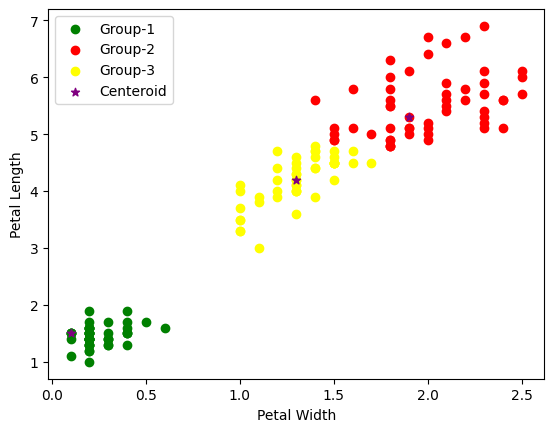

In [27]:
# ploting a grap
plt.scatter(data1["petal_width"],data1["petal_length"],color='green',label='Group-1')
plt.scatter(data2["petal_width"],data2["petal_length"],color='red',label='Group-2')
plt.scatter(data3["petal_width"],data3["petal_length"],color='yellow',label='Group-3')
plt.scatter(x_centers,y_centers,color='purple',marker="*",label='Centeroid')

plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.show()